# Data visualization techniques

### Data Visualisation

### May 2023

### Prerequisites:
- Matplotlib course
- Seaborn course
- Plotly course

### Dataset used: `PhD_v3.csv`

#### Import libraries, read file and check for issues

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# PLOTLY
import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as offline

In [3]:
theses = pd.read_csv("dataset/PhD_v3.csv", dtype={'Date de premiere inscription en doctorat': 'str'})

In [4]:
# fix column spelling issue
theses.rename(columns={'Discipline_prÃ©di': 'Discipline_prédi'}, inplace=True)
theses.head(2)

,Unnamed: 0,Auteur,Identifiant auteur,Titre,Directeur de these,Directeur de these (nom prenom),Identifiant directeur,Etablissement de soutenance,Identifiant etablissement,Discipline,...,Year,Langue de la these,Identifiant de la these,Accessible en ligne,Publication dans theses.fr,Mise a jour dans theses.fr,Discipline_prédi,Genre,etablissement_rec,Langue_rec
0,0,Saeed Al marri,NaN,Le credit documentaire et l'onopposabilite des...,Philippe Delebecque,Delebecque Philippe,29561248,Paris 1,27361802,Driot prive,...,NaN,na,s69480,non,26-01-12,26-01-12,Droit et Science Politique,male,Université Paris 1 - Panthéon Sorbonne,NaN
1,1,Andrea Ramazzotti,174423705,Application de la PGD a la resolution de probl...,"Jean-Claude Grandidier,Marianne Beringhier","Grandidier Jean-Claude,Beringhier Marianne","715,441,511","Chasseneuil-du-Poitou, Ecole nationale superie...",28024400,"Mecanique des solides, des materiaux, des stru...",...,NaN,na,s98826,non,22-11-13,22-11-13,"Materiaux, Milieux et Chimie",female,École nationale supérieure de mécanique et d'a...,NaN


In [5]:
# dataset info()
theses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448047 entries, 0 to 448046
Data columns (total 23 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Unnamed: 0                                448047 non-null  int64  
 1   Auteur                                    448047 non-null  object 
 2   Identifiant auteur                        317700 non-null  object 
 3   Titre                                     448040 non-null  object 
 4   Directeur de these                        448034 non-null  object 
 5   Directeur de these (nom prenom)           448034 non-null  object 
 6   Identifiant directeur                     448047 non-null  object 
 7   Etablissement de soutenance               448046 non-null  object 
 8   Identifiant etablissement                 430965 non-null  object 
 9   Discipline                                448047 non-null  object 
 10  Statut              

In [6]:
# type and number of students for each discipline
theses.Discipline_prédi.value_counts()

Biologie                         100207
Materiaux, Milieux et Chimie      72519
SHS                               57338
Science de l'ingÃ©nieur           34438
Medecine                          31305
Droit et Science Politique        30849
Langues et Litteratures           27376
Economie Gestion                  21785
MathÃ©matiques                    20048
Psychologie                       17264
Informatique                      17058
Science de la Terre               15448
Sciences de l'education            1074
Mathematiques et Informatique       887
Poubelle                            451
Name: Discipline_prédi, dtype: int64

In [7]:
# Let’s first fill 'Year' column NaN with 0
theses['Year'] = theses['Year'].fillna(0)

In [8]:
# Convert our float column into an integer column.
theses['Year'] = theses['Year'].astype('int')

In [9]:
#Check year data type
theses.Year.dtypes

dtype('int32')

#### Fix spelling problems in `Discipline_prédi`

In [10]:
theses["Discipline_prédi"] = theses["Discipline_prédi"].replace(["MathÃ©matiques", "Science de l'ingÃ©nieur"], ["Mathématiques", "Science de l'ingénieur"])

In [11]:
theses["Discipline_prédi"].sample(20)

192492    Materiaux, Milieux et Chimie
31859                         Biologie
287300                             SHS
218880      Droit et Science Politique
23712                      Psychologie
184275                        Biologie
374472                        Biologie
88731     Materiaux, Milieux et Chimie
81504                              SHS
299097                             SHS
136691                        Biologie
338162                    Informatique
282869                        Biologie
351041                    Informatique
2797                               SHS
166515                   Mathématiques
301656          Science de l'ingénieur
163149                        Biologie
122164         Langues et Litteratures
262656         Langues et Litteratures
Name: Discipline_prédi, dtype: object

#### Removing `Pubelle` value

In [12]:
theses = theses[theses.Discipline_prédi != "Poubelle"]
#theses.drop(theses.loc[theses['Discipline_prédi']=="Poubelle"].index, inplace=True)

In [13]:
#theses[theses['Discipline_prédi']=="Poubelle"].value_counts()

In [14]:
theses.Discipline_prédi.value_counts()

Biologie                         100207
Materiaux, Milieux et Chimie      72519
SHS                               57338
Science de l'ingénieur            34438
Medecine                          31305
Droit et Science Politique        30849
Langues et Litteratures           27376
Economie Gestion                  21785
Mathématiques                     20048
Psychologie                       17264
Informatique                      17058
Science de la Terre               15448
Sciences de l'education            1074
Mathematiques et Informatique       887
Name: Discipline_prédi, dtype: int64


### Exercice 1
- Visualize the quantitative changes in various disciplines from 1985 to 2018.
- Graph 1: Stacked area plot
- Graph 2: Stacked bar plot

#### Evolution of the disciplines over time

In [15]:
theses = theses[(theses['Year'] >= 1985) & (theses['Year'] <= 2018)]

# Group the dataframe by year and discipline and count the number of theses in each group
counts = theses.groupby(['Year', 'Discipline_prédi']).size().unstack()

In [16]:
counts.head()

Discipline_prédi,Biologie,Droit et Science Politique,Economie Gestion,Informatique,Langues et Litteratures,"Materiaux, Milieux et Chimie",Mathematiques et Informatique,Mathématiques,Medecine,Psychologie,SHS,Science de l'ingénieur,Science de la Terre,Sciences de l'education
Year,,,,,,,,,,,,,,
1985,695,168,220,45,268,331,2,120,434,94,380,136,109,5
1986,967,400,390,69,415,635,1,331,364,239,863,244,243,1
1987,1716,413,413,101,646,1359,8,766,225,726,1069,367,626,3
1988,1815,374,332,121,457,1233,12,610,3736,688,868,340,453,6
1989,1649,378,281,144,415,1405,10,723,3926,647,701,399,415,6


#### Stacked area plot
 - NB: Area plots are appropriate to study the evolution of the whole and the relative proportions of each discipline, but not to study the evolution of each individual discipline.

In [17]:
# Place 'Medecine' at the top by reordering the columns
counts = counts[[col for col in counts.columns if col != 'Medecine'] + ['Medecine']]

# Same for 'Biologie'
counts = counts[[col for col in counts.columns if col != 'Biologie'] + ['Biologie']]

# Rearrange the columns to place 'Medecine' at the top, followed by 'Biologie'R
counts = counts[[col for col in counts.columns if col not in ['Medecine', 'Biologie']] + ['Biologie', 'Medecine']]

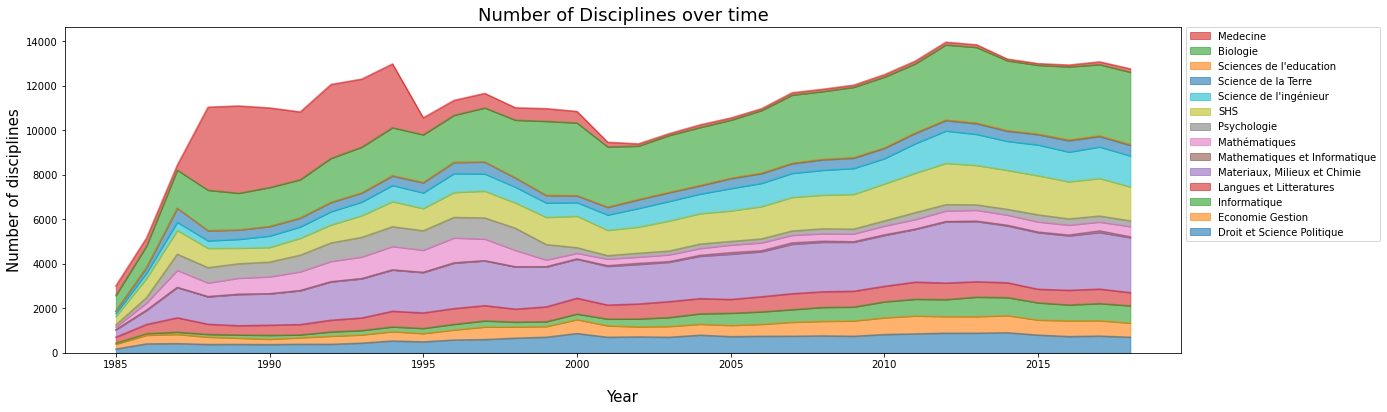

In [18]:
# Create a stacked area chart of the counts
ax = counts.plot(kind='area', stacked=True, figsize=(20,6), alpha=0.6)

# Set the title and axis labels
ax.set_title('Number of Disciplines over time', fontsize=18)
ax.set_xlabel('Year', labelpad=20, fontsize=15)
ax.set_ylabel('Number of disciplines',fontsize=15)

# Set the legend
handles, labels = ax.get_legend_handles_labels()
handles = handles[::-1]
labels = labels[::-1]
ax.legend(handles, labels, loc='center left', fontsize=10, bbox_to_anchor=(1, 0.67))

# Rotate the x-axis labels
plt.xticks(rotation=360)

# Show the plot
plt.show()

### Shrink the plot

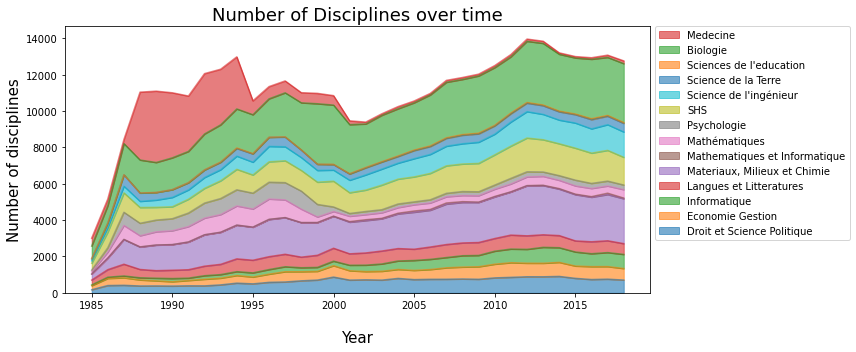

In [19]:
# Create a stacked area chart of the counts
ax = counts.plot(kind='area', stacked=True, alpha=0.6)

# Set the title and axis labels
ax.set_title('Number of Disciplines over time', fontsize=18)
ax.set_xlabel('Year', labelpad=20, fontsize=15)
ax.set_ylabel('Number of disciplines',fontsize=15)

# Set the legend
handles, labels = ax.get_legend_handles_labels()
handles = handles[::-1]
labels = labels[::-1]
ax.legend(handles, labels, loc='center left', fontsize=10, bbox_to_anchor=(1, 0.6))

# Rotate the x-axis labels
plt.xticks(rotation=360)

# Set the figure size and aspect ratio
fig = plt.gcf()
fig.set_size_inches(12, 5)
fig.tight_layout()


# Show the plot
plt.show()




### Ex 1.2 Stacked Bar Char

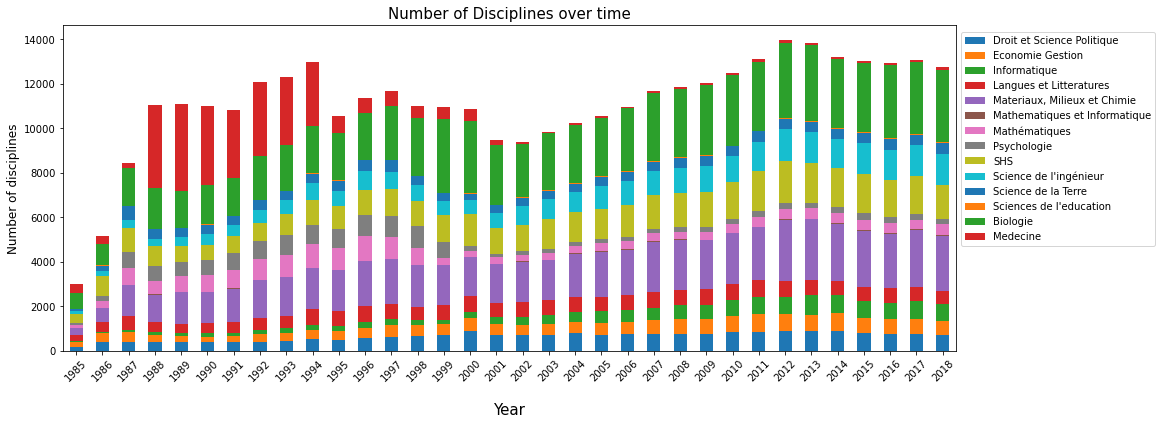

In [20]:
# Create a larger figure
plt.rcParams['figure.figsize'] = (16,6)

# Create a bar chart of the counts
counts.plot(kind='bar', stacked=True)

# Set the title and axis labels
plt.title('Number of Disciplines over time', fontsize=15)
plt.xlabel('Year', labelpad=20, fontsize=15)
plt.ylabel('Number of disciplines',fontsize=12)
plt.legend(loc='center left', fontsize=10, bbox_to_anchor=(1, 0.65))

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Show the plot
plt.show();

The code above creates a bar chart of the number of disciplines over time, where each bar represents a year and the height of the bar represents the total number of disciplines in that year. The bars are stacked, with each color representing a different discipline.

### Exercice 2
- Use matplotlib or seaborn
- Plot 1 with a background grid
- Plot 2 slightly transparent, so that the grid appears behind the plot (alpha)

In [21]:
# Count the number of theses in each discipline category
discipline_counts = theses['Discipline_prédi'].value_counts().reset_index()
discipline_counts.columns = ['Discipline', 'Count']

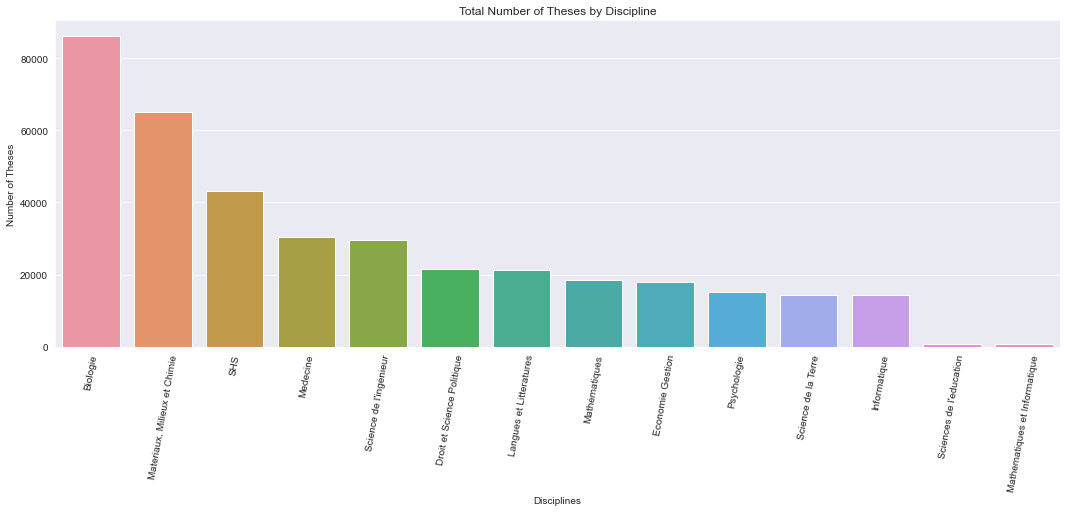

In [22]:
plt.rcParams['figure.figsize'] = (18,6)

# Create the plot using seaborn
#sns.set(style='whitegrid') OR
sns.set_style("darkgrid")
sns.barplot(x='Discipline', y='Count', data=discipline_counts)

# Add title and axis labels
plt.title('Total Number of Theses by Discipline')
plt.xlabel('Disciplines')
plt.ylabel('Number of Theses')

# Rotate the x-axis labels
plt.xticks(rotation=80)

# Show the plot
plt.show()


- First set the background of the plot to be transparent by setting the axes.facecolor and figure.facecolor to none using the sns.set() function.
- Then create the bar plot using the sns.barplot() function from seaborn, using the 'Discipline' column as the x-axis and the 'Count' column as the y-axis. 
- Set the alpha parameter to 0.4 to make the bars slightly transparent.

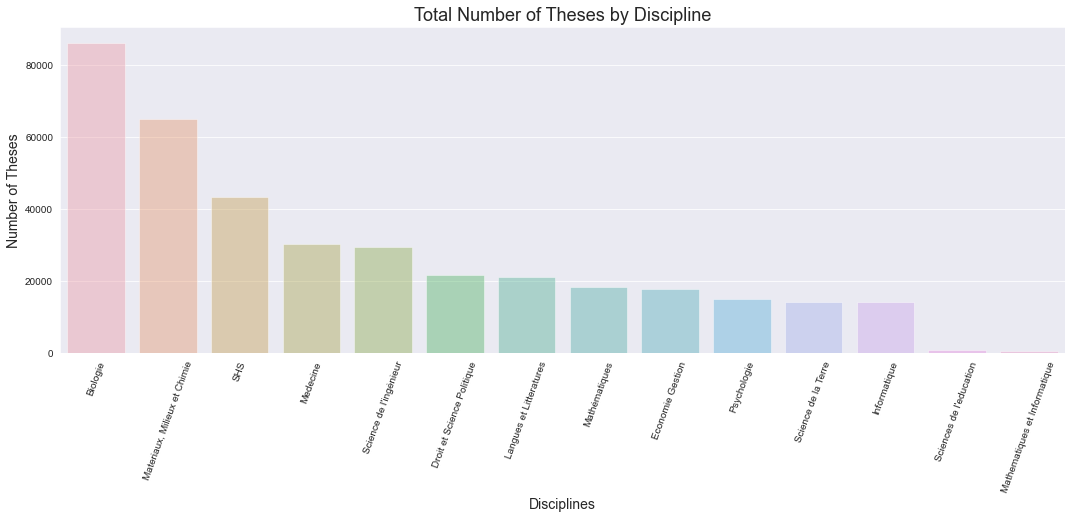

In [23]:
# Create the plot using seaborn with a transparent background
#sns.set(style='whitegrid') OR
sns.set_style("darkgrid")
#sns.set(rc={'axes.facecolor':'none', 'figure.facecolor':'none'})
sns.barplot(x='Discipline', y='Count', data=discipline_counts, alpha=0.4)

# Add title and axis labels
plt.title('Total Number of Theses by Discipline', fontsize=18)
plt.xlabel('Disciplines', fontsize=14)
plt.ylabel('Number of Theses', fontsize=14)

# Rotate the x-axis labels
plt.xticks(rotation=70)

# Show the plot
plt.show()


### Exercice 3
- Graph with a grid (no transparency)
- Adjust the padding or spacing between the axis and the corresponding labels
- Produce a graph 1 with the labels of the X axis clearly off the axis
- Produce a graph 2 with the labels at 45°.

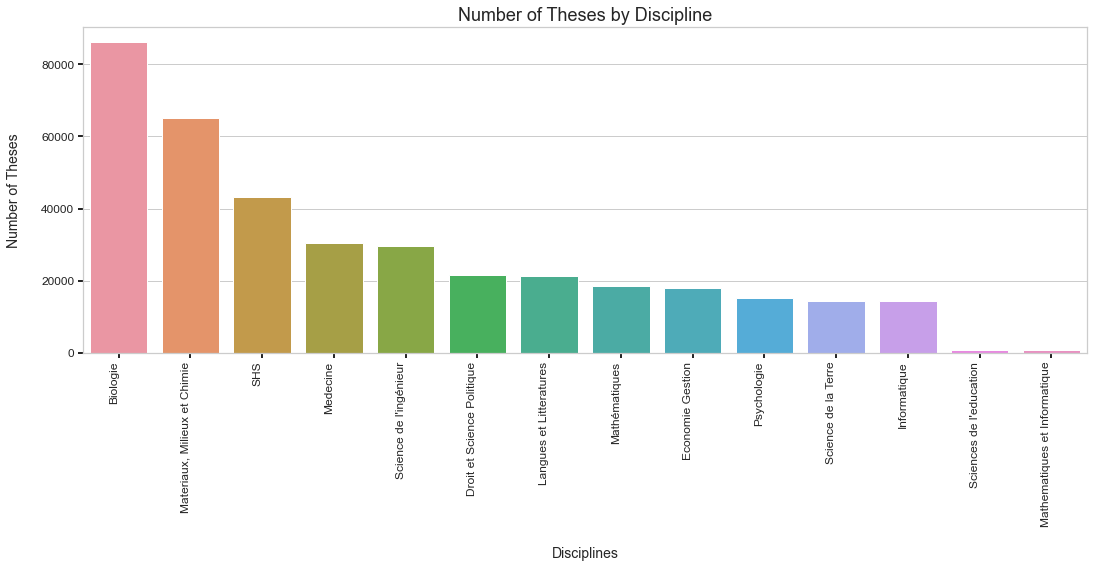

In [24]:
# Create the first plot with axis labels spaced out
sns.set(style='whitegrid')
ax = sns.barplot(x='Discipline', y='Count', data=discipline_counts)
# Ticks on both axes
ax.tick_params(axis='both', length=5, width=2, labelsize=12, bottom=True, left=True)
# Ticks on x-axis only: ax.tick_params(axis='x', length=5, bottom=True)
ax.set_xticklabels(ax.get_xticklabels(), ha='right', rotation=90)
plt.title('Number of Theses by Discipline', fontsize=18)
plt.xlabel('Disciplines', labelpad=20, fontsize=14)
plt.ylabel('Number of Theses', labelpad=20, fontsize=14)

# Show the plots
plt.show()


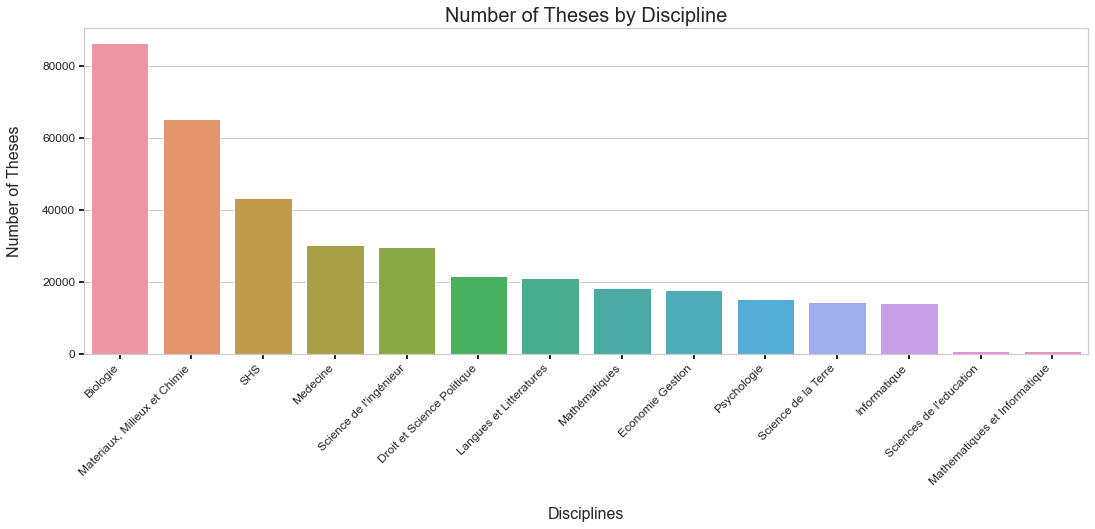

In [25]:
# Create the second plot with axis labels at a 45-degree angle
sns.set(style='whitegrid')
ax = sns.barplot(x='Discipline', y='Count', data=discipline_counts)
ax.tick_params(axis='both', length=5, width=2, labelsize=12, bottom=True, left=True)
#ax.tick_params(axis='x', length=5, bottom=True)
ax.set_xticklabels(ax.get_xticklabels(), ha='right', rotation=45)
plt.title('Number of Theses by Discipline', fontsize=20)
plt.xlabel('Disciplines', labelpad=20, fontsize=16)
plt.ylabel('Number of Theses', labelpad=20, fontsize=16)

# Show the plots
plt.show()

### Exercice 4
- Same graphic, but use `Times New Roman` or `Garamond` font
- Several graphics by changing labels and title font size
- Graphic 2: change the size of the margins to "squash" the graphic a bit towards the center

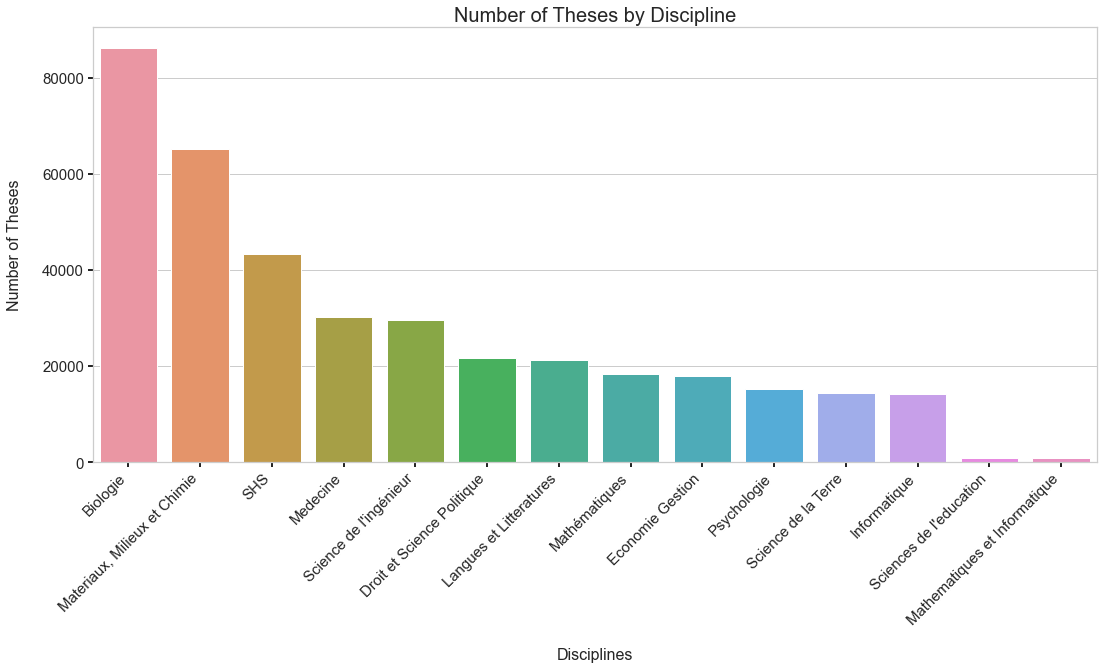

In [26]:
fig, ax = plt.subplots(figsize=(18,8))
# Set the font to Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'

# Create the second plot with axis labels at a 45-degree angle
sns.set(style='whitegrid')
ax = sns.barplot(x='Discipline', y='Count', data=discipline_counts)
# Add ticks on both axes
ax.tick_params(axis='both', length=5, width=2, labelsize=15, bottom=True, left=True)

ax.set_xticklabels(ax.get_xticklabels(), ha='right', rotation=45)
plt.title('Number of Theses by Discipline', fontsize=20)
plt.xlabel('Disciplines', labelpad=20, fontsize=16)
plt.ylabel('Number of Theses', labelpad=20, fontsize=16)

# Show the plots
plt.show()

#### Changing size and fonts

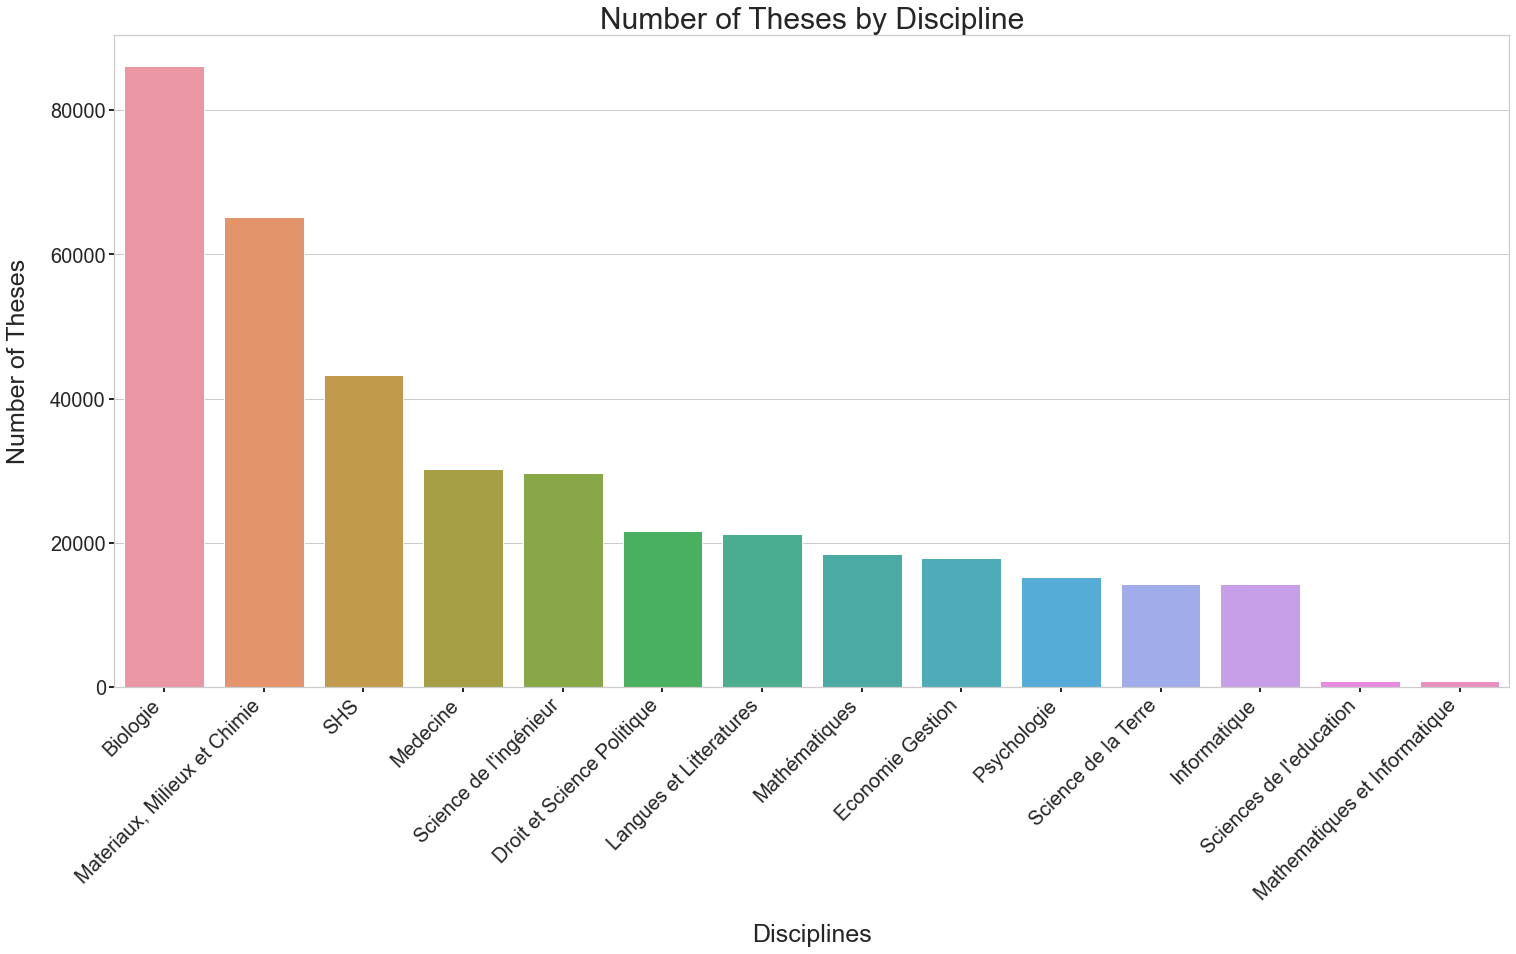

In [27]:
# Set the figure
fig, ax = plt.subplots(figsize=(25,12))

# Set the font to Times New Roman
plt.rcParams['font.family'] = 'Garamond'

# Create the second plot with axis labels at a 45-degree angle
sns.set(style='whitegrid')
ax = sns.barplot(x='Discipline', y='Count', data=discipline_counts)

# Add ticks on both axes
ax.tick_params(axis='both', length=5, width=2, labelsize=20, bottom=True, left=True)

ax.set_xticklabels(ax.get_xticklabels(), ha='right', rotation=45)
plt.title('Number of Theses by Discipline', fontsize=30)
plt.xlabel('Disciplines', labelpad=20, fontsize=25)
plt.ylabel('Number of Theses', labelpad=20, fontsize=25)

# Show the plots
plt.show()

#### 4.2  Second graph

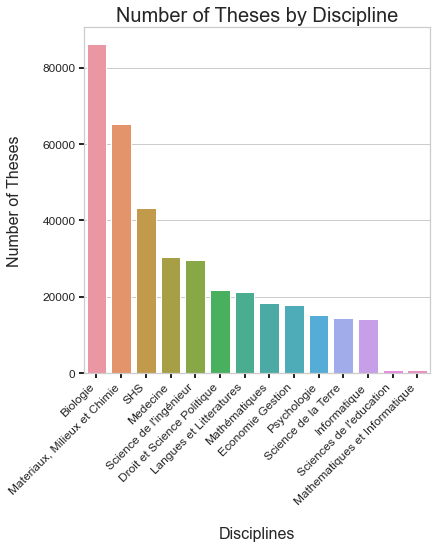

In [28]:
# Set the figure size
fig, ax = plt.subplots(figsize=(12, 6))

# Create the second plot with axis labels at a 45-degree angle
sns.set(style='whitegrid')
ax = sns.barplot(x='Discipline', y='Count', data=discipline_counts)
ax.tick_params(axis='both', length=5, width=2, labelsize=12, bottom=True, left=True)
ax.set_xticklabels(ax.get_xticklabels(), ha='right', rotation=45)
plt.title('Number of Theses by Discipline', fontsize=20)
plt.xlabel('Disciplines', labelpad=20, fontsize=16)
plt.ylabel('Number of Theses', labelpad=20, fontsize=16)

# Adjust the margins
plt.subplots_adjust(left=0.5, right=0.9, bottom=0.1, top=0.9)

# Show the plot
plt.show()


### Exercice 5
- Change the scale of Y to a logarithmic scale

In [29]:
import numpy as np

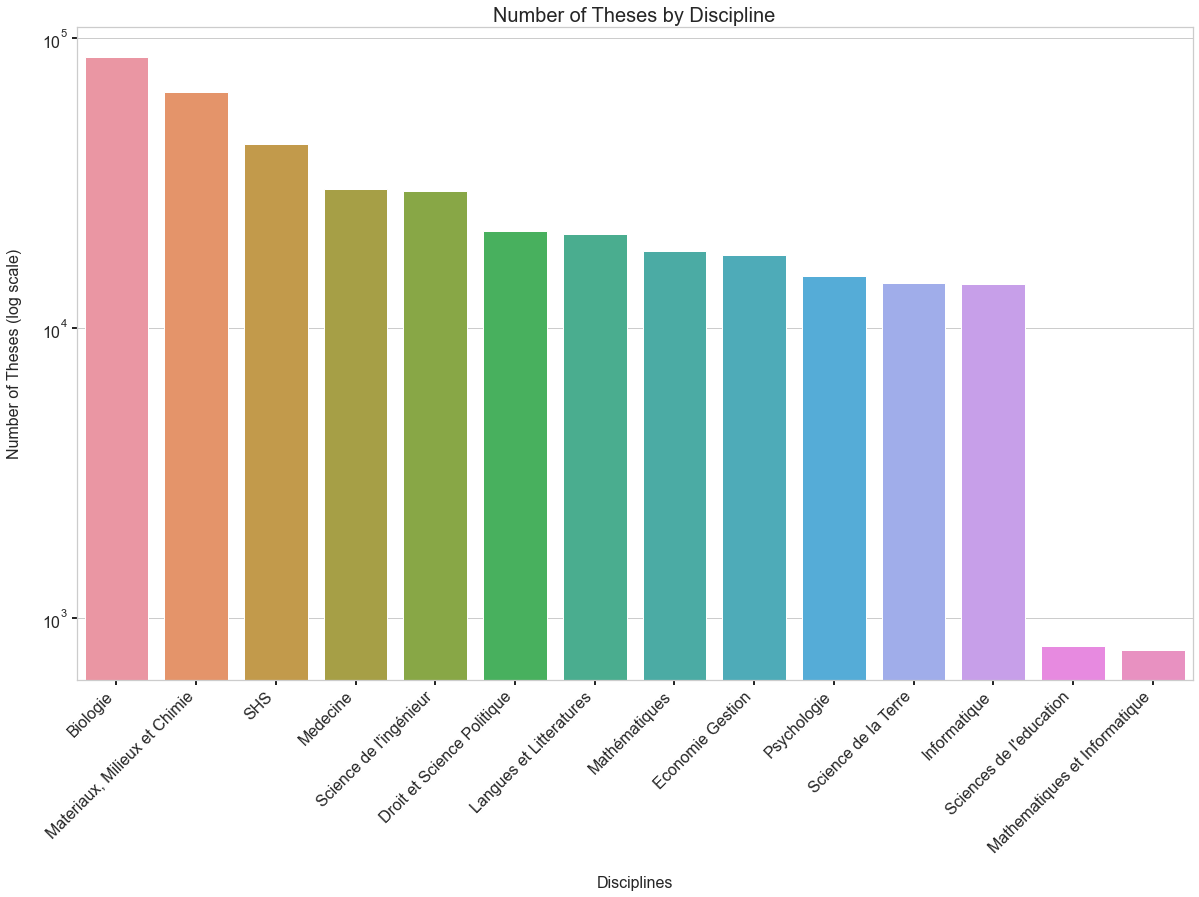

In [30]:
# Set the figure size
fig, ax = plt.subplots(figsize=(20,12))

# Create the plot with logarithmic y-axis scale
sns.set(style='whitegrid')
ax = sns.barplot(x='Discipline', y='Count', data=discipline_counts)
ax.set_yscale('log')
ax.tick_params(axis='both', length=5, width=2, labelsize=16, bottom=True, left=True)
ax.set_xticklabels(ax.get_xticklabels(), ha='right', rotation=45)
plt.title('Number of Theses by Discipline', fontsize=20)
plt.xlabel('Disciplines', labelpad=20, fontsize=16)
plt.ylabel('Number of Theses (log scale)', labelpad=20, fontsize=16)

# Show the plot
plt.show()


### Exercice 6
- Generate some graphs with the legend positioned at different locations, such as the top-right corner, showcasing the various disciplines.

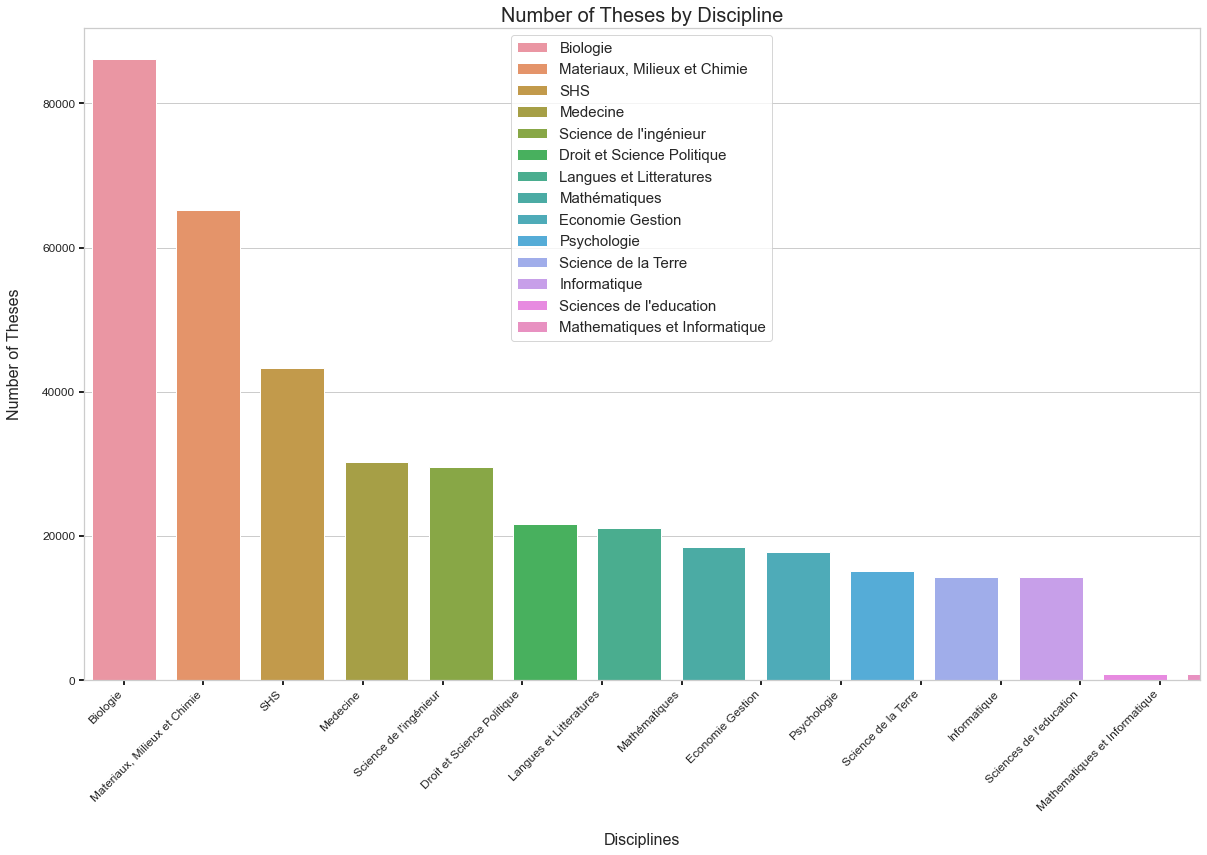

In [31]:
# Set the figure size
fig, ax = plt.subplots(figsize=(20, 12))

# Create the second plot with axis labels at a 45-degree angle
sns.set(style='whitegrid')
sns.barplot(x='Discipline', y='Count', data=discipline_counts, hue='Discipline', ax=ax)
ax.tick_params(axis='both', length=5, width=2, labelsize=12, bottom=True, left=True)
ax.set_xticklabels(ax.get_xticklabels(), ha='right', rotation=45)
plt.title('Number of Theses by Discipline', fontsize=20)
plt.xlabel('Disciplines', labelpad=20, fontsize=16)
plt.ylabel('Number of Theses', labelpad=20, fontsize=16)

# Adjust the width of the bars
for bar in ax.patches:
    bar.set_width(0.8)  # Adjust the width as needed

# Show the legend
plt.legend(loc='upper center', fontsize=15)

# Show the plot
plt.show()


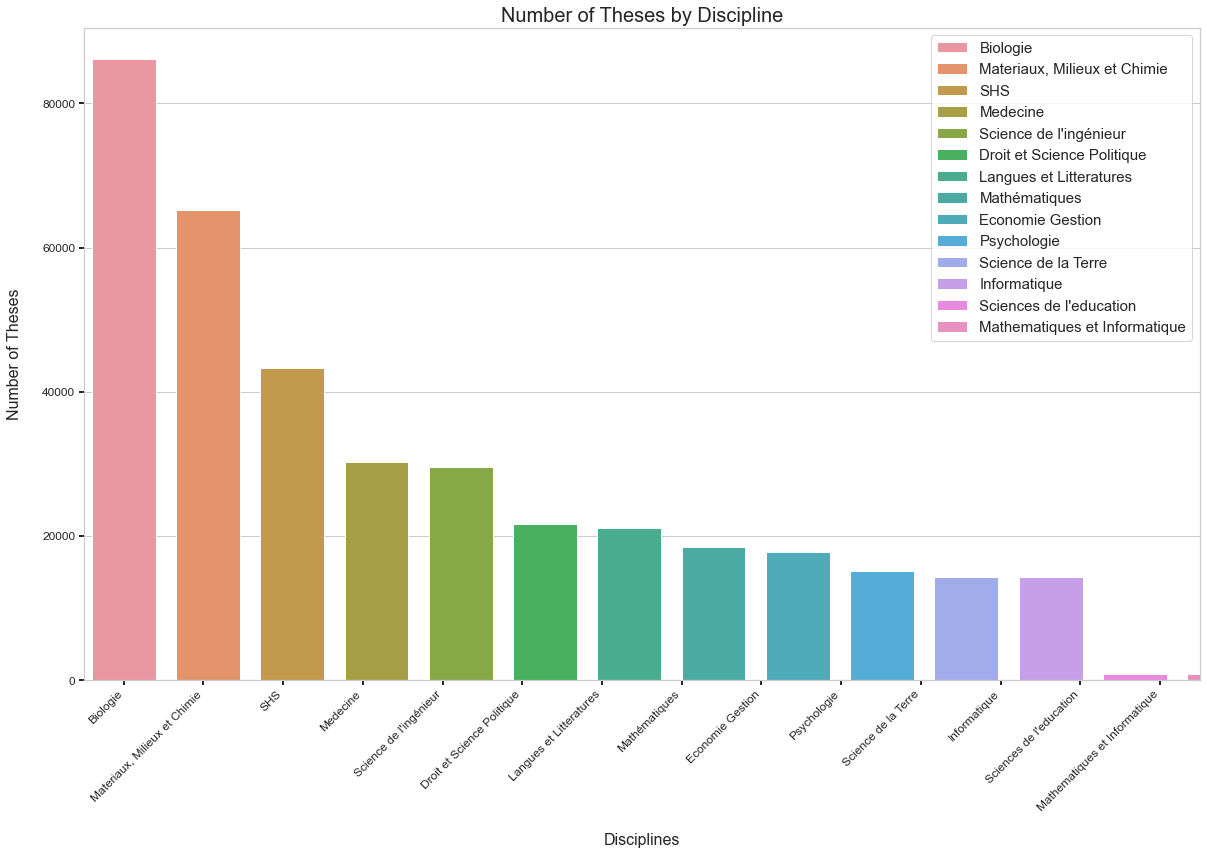

In [32]:
# Set the figure size
fig, ax = plt.subplots(figsize=(20, 12))

# Create the second plot with axis labels at a 45-degree angle
sns.set(style='whitegrid')
sns.barplot(x='Discipline', y='Count', data=discipline_counts, hue='Discipline', ax=ax)
ax.tick_params(axis='both', length=5, width=2, labelsize=12, bottom=True, left=True)
ax.set_xticklabels(ax.get_xticklabels(), ha='right', rotation=45)
plt.title('Number of Theses by Discipline', fontsize=20)
plt.xlabel('Disciplines', labelpad=20, fontsize=16)
plt.ylabel('Number of Theses', labelpad=20, fontsize=16)


# Adjust the width of the bars
for bar in ax.patches:
    bar.set_width(0.8)  # Adjust the width as needed

# Show the legend
plt.legend(loc='upper right', fontsize=15)

# Show the plot
plt.show()


## Exercice 7
- Modify the color palette to depict the distinct disciplines.

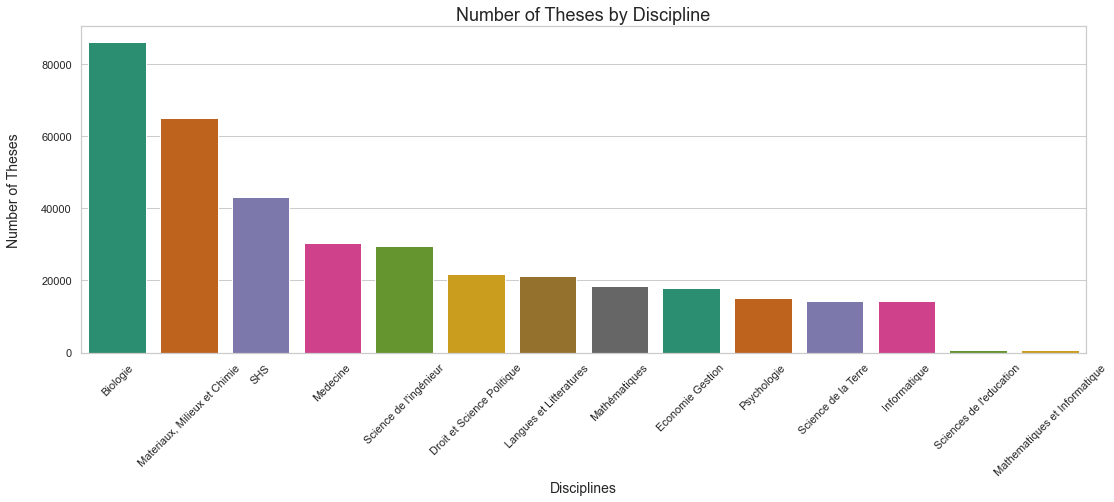

In [33]:
# Count the number of theses in each discipline category
#discipline_counts = theses['Discipline_prédi'].value_counts().reset_index()
#discipline_counts.columns = ['Discipline', 'Count']

# Set the color palette
sns.set_palette('Dark2')

# Create the plot using seaborn
sns.set(style='whitegrid')
sns.barplot(x='Discipline', y='Count', data=discipline_counts, palette='Dark2')

# Add title and axis labels
plt.title('Number of Theses by Discipline', fontsize=18)
plt.xlabel('Disciplines',fontsize=14)
plt.ylabel('Number of Theses', labelpad=20, fontsize=14)

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Show the plot
plt.show()


### Exercice 8
- Rearrange the order of the disciplines to display them from bottom to top.

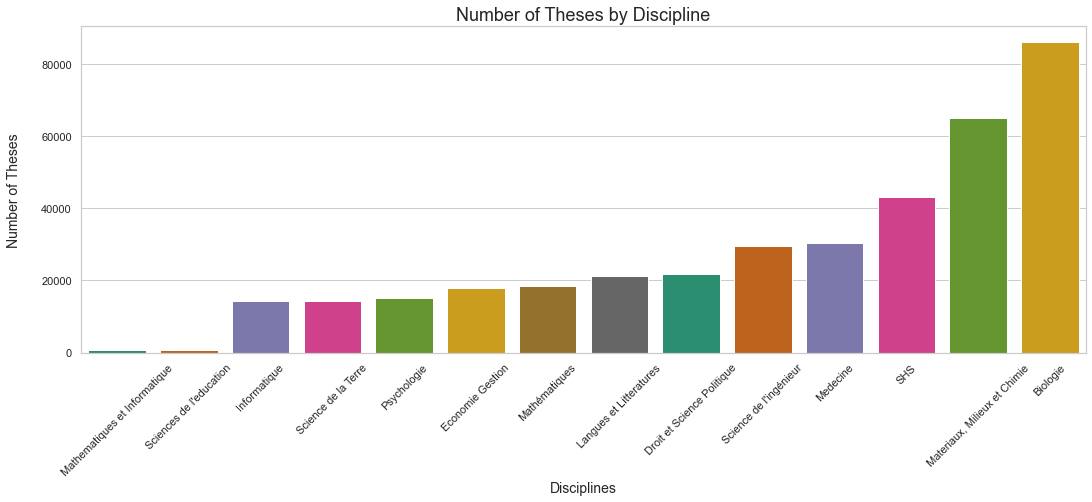

In [34]:
# Count the number of theses in each discipline category
#discipline_counts = theses['Discipline_prédi'].value_counts().reset_index()
#discipline_counts.columns = ['Discipline', 'Count']

# Set the color palette
sns.set_palette('Dark2')

# Create the plot using seaborn
sns.set(style='whitegrid')
sns.barplot(x='Discipline', y='Count', data=discipline_counts, palette='Dark2', order=discipline_counts['Discipline'][::-1])

# Add title and axis labels
plt.title('Number of Theses by Discipline', fontsize=18)
plt.xlabel('Disciplines',fontsize=14)
plt.ylabel('Number of Theses', labelpad=20,fontsize=14)

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Show the plot
plt.show()

### Exercice 9



- Create an interactive chart using Plotly, which includes a `slider` for selecting different values from the dataset. 
- Create a second interactive graph using Plotly that includes a `selector` for making specific choices.
- https://stackoverflow.com/questions/59090625/python-plotly-rangeselector-for-data

### Slider

This will generate a line plot using Plotly, which will be accompanied by a range slider. The slider will enable the user to select a specific range of years to be displayed on the plot.

In [35]:
# Group by year and language and count the number of occurrences
counts = theses.groupby(['Year', 'Langue_rec']).size().reset_index(name='counts')

# Create the figure
fig = go.Figure()


# Create traces for each language
for lang in counts['Langue_rec'].unique():
    lang_counts = counts[counts['Langue_rec'] == lang]
    fig.add_trace(go.Scatter(x=lang_counts['Year'], y=lang_counts['counts'], name=lang, mode='lines'))

# Add slider
fig.update_layout(
    xaxis=dict(
        rangeslider=dict(
            visible=True
        ),
        type="linear"
    ),
    title='Languages used over time',
    xaxis_title='Year',
    yaxis_title='Number of Theses'
)
# Save the plot as an HTML file
offline.plot(fig, filename='dataset/visualization_20230517.html')

# Show the plot
#fig.show()


'dataset/visualization_20230517.html'

#### Selector

Enhance the plot by incorporating interactive buttons to enable the selection of different options.

In [36]:
# Group by year and language and count the number of occurrences
counts = theses.groupby(['Year', 'Langue_rec']).size().reset_index(name='counts')

# Create the line plot
fig = px.line(counts, x='Year', y='counts', color='Langue_rec', title='Languages used over time', labels={'Langue_rec': 'Languages'})
fig.update_layout(xaxis_title='Year', yaxis_title='Number of Theses')
fig.update_traces(mode='lines')


# Add a slider
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=5, label="5 years", step="year", stepmode="backward"),
                dict(count=10, label="10 years", step="year", stepmode="backward"),
                dict(count=20, label="20 years", step="year", stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(visible=True),
        type="date"
    )
)

# Save the plot as an HTML file
offline.plot(fig, filename='dataset/visualization_20230517_II.html')

# Show the plot
#fig.show()

'dataset/visualization_20230517_II.html'